<center><font size=6> Neural Network </font></center>

## Problem Statement

### Context

### Objective

### Data Dictionary

## Importing necessary libraries

In [1]:
#!pip uninstall tensorflow
#!pip install tensorflow-1.6.0-cp36-cp36m-win_amd64.whl
#!pip install tensorflow --upgrade --force-reinstall

In [2]:
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user
#!pip install tensorflow==2.17.0 scikit-learn==1.3.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.26.0 pandas==2.1.4 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
!pip install tensorflow==2.17.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.26.0 pandas==2.1.4 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [3]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#!pip install --upgrade scikit-learn
#!pip uninstall scikit-learn

In [5]:
#!pip install scikit-learn==1.2.2

In [6]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE

## Loading the dataset

In [7]:
df_main = pd.read_csv("/content/sample_data/dataset_engineered.csv")
data = df_main.copy()

## Data Overview

- Observations
- Sanity checks

### Displaying the first and last few rows of the dataset

In [8]:
data.head()

,VEC_soma,atomic_ea_soma,atomic_ebe _soma,atomic_en_allen _soma,atomic_en_allredroch_soma,atomic_en_paul_soma,atomic_en_sanderson_soma,atomic_enc_soma,atomic_hatm_soma,atomic_hfu_soma,...,entalpia_oxidos_media_x_combustion,gibbs_oxidos_minimo_x_hydrothermal,melting_point_media_x_solid_state,boiling_point_media_x_solvo,atomic_en_paul_media_x_chemical_co_precipitation,atomic_radius_desvio_x_ball_mill,VEC_media_x_hydrothermal,density_of_solid_desvio_x_mechanochemical,thermal_conduct_media_x_combustion,phase
0,0.304049,53.73511,223.3483,0.000000,1.647965,1.770483,2.117934,223.3483,395.0355,16.547080,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,spinel
1,0.318974,72.08000,175.6000,0.000000,1.658000,1.830000,2.014000,175.6000,425.0000,16.620000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,spinel
2,0.295788,59.64000,193.8000,0.322600,1.624000,1.778000,2.014000,193.8000,399.0000,15.680000,...,-0.0,-0.0,0.0,0.0,0.0,1.095445,0.0,460.169040,0.0,multiphase
3,0.262740,19.90398,110.0220,0.811162,1.356938,1.398613,1.495299,110.0220,229.0458,9.625258,...,-0.0,-0.0,0.0,0.0,0.0,5.214466,0.0,488.715606,0.0,spinel
4,0.091794,31.34000,66.6000,0.000000,1.186000,1.278000,0.398000,66.6000,510.2000,15.380000,...,-0.0,-0.0,0.0,0.0,0.0,4.118252,0.0,607.688033,0.0,fluorite


In [9]:
data.tail()

,VEC_soma,atomic_ea_soma,atomic_ebe _soma,atomic_en_allen _soma,atomic_en_allredroch_soma,atomic_en_paul_soma,atomic_en_sanderson_soma,atomic_enc_soma,atomic_hatm_soma,atomic_hfu_soma,...,entalpia_oxidos_media_x_combustion,gibbs_oxidos_minimo_x_hydrothermal,melting_point_media_x_solid_state,boiling_point_media_x_solvo,atomic_en_paul_media_x_chemical_co_precipitation,atomic_radius_desvio_x_ball_mill,VEC_media_x_hydrothermal,density_of_solid_desvio_x_mechanochemical,thermal_conduct_media_x_combustion,phase
742,0.186085,41.555,119.55,0.0,1.3610,1.4235,1.10300,119.55,387.750,10.3550,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cubic perovskite
743,0.184803,39.155,119.65,0.0,1.3580,1.4210,1.08500,119.65,387.200,10.2350,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cubic perovskite
744,0.284205,52.660,229.40,0.0,1.5980,1.8660,2.01000,229.40,442.400,19.2800,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spinel
745,0.094346,42.750,57.75,0.0,1.1575,1.2450,0.53125,57.75,512.125,14.6375,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pyrochlore
746,0.181065,28.800,84.00,0.0,1.2050,1.2530,0.54500,84.00,371.900,15.0800,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pyrochlore


### Checking the shape of the dataset and data types of the various columns

In [10]:
data.shape

(747, 277)

* The dataset has 10000 rows and 14 columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 277 entries, VEC_soma to phase
dtypes: float64(183), int64(93), object(1)
memory usage: 1.6+ MB


### Checking for duplicate and null values

In [12]:
# checking for null values
data.isnull().sum()

,0
VEC_soma,0
atomic_ea_soma,0
atomic_ebe _soma,0
atomic_en_allen _soma,0
atomic_en_allredroch_soma,0
...,...
atomic_radius_desvio_x_ball_mill,0
VEC_media_x_hydrothermal,0
density_of_solid_desvio_x_mechanochemical,0
thermal_conduct_media_x_combustion,0


### The number of unique values in the columns in the data set

In [13]:
# list of all columns
data_col = data.columns

#number of unique values in all columns
for col in data_col:
  print(data[col].nunique(), "\t", col)

571 	 VEC_soma
476 	 atomic_ea_soma
534 	 atomic_ebe _soma
175 	 atomic_en_allen _soma
463 	 atomic_en_allredroch_soma
519 	 atomic_en_paul_soma
428 	 atomic_en_sanderson_soma
534 	 atomic_enc_soma
556 	 atomic_hatm_soma
539 	 atomic_hfu_soma
539 	 atomic_hvap_soma
534 	 atomic_ie_soma
534 	 atomic_orbital_radii_soma
518 	 atomic_radius_calculated_soma
306 	 atomic_radius_soma
337 	 atomic_spacegroupnum_soma
572 	 boiling_point_soma
552 	 brinell_hardness_soma
520 	 bulk_mod_soma
551 	 coeff_of_lte_soma
447 	 covalent_rad_emp_soma
495 	 covalent_rad_soma
38 	 critical_temperature_soma
573 	 deltaCp-oxidos_soma
573 	 density_of_solid_soma
565 	 electrical_resist_soma
573 	 entalpia-oxidos_soma
573 	 entropia-oxidos_soma
573 	 gibbs-oxidos_soma
575 	 liquid_range_soma
572 	 melting_point_soma
352 	 mineral_hardness_soma
1 	 molar_vol_soma
534 	 paul_ionic_radii_soma
382 	 poissons_ratio_soma
280 	 reflectivity_soma
28 	 refract_index_soma
546 	 rigidity_mod_soma
357 	 supercond_temp_soma

### The statistical summary of the numerical columns in the data

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VEC_soma,747.0,0.211429,0.090534,0.063334,0.121800,0.206357,0.305634,0.379742
atomic_ea_soma,747.0,43.759193,14.658404,9.181875,35.150000,45.350000,51.140000,89.760000
atomic_ebe _soma,747.0,122.829722,61.082246,5.356000,64.078850,120.800000,181.408650,334.800000
atomic_en_allen _soma,747.0,0.169097,0.255764,0.000000,0.000000,0.000000,0.258600,1.483585
atomic_en_allredroch_soma,747.0,1.405349,0.212899,1.045000,1.175312,1.385000,1.618000,1.793692
...,...,...,...,...,...,...,...,...
atomic_en_paul_media_x_chemical_co_precipitation,747.0,0.021040,0.073547,0.000000,0.000000,0.000000,0.000000,0.364113
atomic_radius_desvio_x_ball_mill,747.0,0.686720,3.919325,0.000000,0.000000,0.000000,0.000000,32.715629
VEC_media_x_hydrothermal,747.0,0.003212,0.013135,0.000000,0.000000,0.000000,0.000000,0.067127
density_of_solid_desvio_x_mechanochemical,747.0,39.831139,182.835227,0.000000,0.000000,0.000000,0.000000,1890.181587


In [15]:
data["phase"].value_counts()

,count
phase,
spinel,227
cubic perovskite,123
fluorite,102
multiphase,72
pyrochlore,40
rock salt,33
orthorhombic perovskite,23
amorphous,18
monoclinic,18


In [16]:
data["phase"].value_counts()[data["phase"].value_counts() > 20]

,count
phase,
spinel,227
cubic perovskite,123
fluorite,102
multiphase,72
pyrochlore,40
rock salt,33
orthorhombic perovskite,23


## Data Preprocessing

### Dummy Variable Creation

In [17]:
data2 = data.copy()

In [18]:
## Separating Independent and Dependent Columns
X = data2.drop(['phase'],axis=1)
Y = data2['phase']

In [19]:
Y_new = pd.DataFrame(Y)
value_counts = Y.value_counts()
Y_new['singular_phase'] = Y_new['phase'].apply(
    lambda x: x if value_counts[x] > 3 else 'single-phase'
)

In [20]:
Y_new.head()

,phase,singular_phase
0,spinel,spinel
1,spinel,spinel
2,multiphase,multiphase
3,spinel,spinel
4,fluorite,fluorite


In [21]:
Y_new['singular_phase'].value_counts()

,count
singular_phase,
spinel,227
cubic perovskite,123
fluorite,102
multiphase,72
pyrochlore,40
rock salt,33
orthorhombic perovskite,23
single-phase,21
monoclinic,18


In [22]:
X.columns

Index(['VEC_soma', 'atomic_ea_soma', 'atomic_ebe _soma',
       'atomic_en_allen _soma', 'atomic_en_allredroch_soma',
       'atomic_en_paul_soma', 'atomic_en_sanderson_soma', 'atomic_enc_soma',
       'atomic_hatm_soma', 'atomic_hfu_soma',
       ...
       'has_zero_VEC_minimo', 'entalpia_oxidos_media_x_combustion',
       'gibbs_oxidos_minimo_x_hydrothermal',
       'melting_point_media_x_solid_state', 'boiling_point_media_x_solvo',
       'atomic_en_paul_media_x_chemical_co_precipitation',
       'atomic_radius_desvio_x_ball_mill', 'VEC_media_x_hydrothermal',
       'density_of_solid_desvio_x_mechanochemical',
       'thermal_conduct_media_x_combustion'],
      dtype='object', length=276)

In [23]:
#Confirming that there are no null values for each columns.
X.isnull().sum()

,0
VEC_soma,0
atomic_ea_soma,0
atomic_ebe _soma,0
atomic_en_allen _soma,0
atomic_en_allredroch_soma,0
...,...
atomic_en_paul_media_x_chemical_co_precipitation,0
atomic_radius_desvio_x_ball_mill,0
VEC_media_x_hydrothermal,0
density_of_solid_desvio_x_mechanochemical,0


In [24]:
Y.isnull().sum()

0

In [25]:
X.head()

,VEC_soma,atomic_ea_soma,atomic_ebe _soma,atomic_en_allen _soma,atomic_en_allredroch_soma,atomic_en_paul_soma,atomic_en_sanderson_soma,atomic_enc_soma,atomic_hatm_soma,atomic_hfu_soma,...,has_zero_VEC_minimo,entalpia_oxidos_media_x_combustion,gibbs_oxidos_minimo_x_hydrothermal,melting_point_media_x_solid_state,boiling_point_media_x_solvo,atomic_en_paul_media_x_chemical_co_precipitation,atomic_radius_desvio_x_ball_mill,VEC_media_x_hydrothermal,density_of_solid_desvio_x_mechanochemical,thermal_conduct_media_x_combustion
0,0.304049,53.73511,223.3483,0.000000,1.647965,1.770483,2.117934,223.3483,395.0355,16.547080,...,0,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.318974,72.08000,175.6000,0.000000,1.658000,1.830000,2.014000,175.6000,425.0000,16.620000,...,0,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.295788,59.64000,193.8000,0.322600,1.624000,1.778000,2.014000,193.8000,399.0000,15.680000,...,0,-0.0,-0.0,0.0,0.0,0.0,1.095445,0.0,460.169040,0.0
3,0.262740,19.90398,110.0220,0.811162,1.356938,1.398613,1.495299,110.0220,229.0458,9.625258,...,0,-0.0,-0.0,0.0,0.0,0.0,5.214466,0.0,488.715606,0.0
4,0.091794,31.34000,66.6000,0.000000,1.186000,1.278000,0.398000,66.6000,510.2000,15.380000,...,0,-0.0,-0.0,0.0,0.0,0.0,4.118252,0.0,607.688033,0.0


In [26]:
X.head()

,VEC_soma,atomic_ea_soma,atomic_ebe _soma,atomic_en_allen _soma,atomic_en_allredroch_soma,atomic_en_paul_soma,atomic_en_sanderson_soma,atomic_enc_soma,atomic_hatm_soma,atomic_hfu_soma,...,has_zero_VEC_minimo,entalpia_oxidos_media_x_combustion,gibbs_oxidos_minimo_x_hydrothermal,melting_point_media_x_solid_state,boiling_point_media_x_solvo,atomic_en_paul_media_x_chemical_co_precipitation,atomic_radius_desvio_x_ball_mill,VEC_media_x_hydrothermal,density_of_solid_desvio_x_mechanochemical,thermal_conduct_media_x_combustion
0,0.304049,53.73511,223.3483,0.000000,1.647965,1.770483,2.117934,223.3483,395.0355,16.547080,...,0,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.318974,72.08000,175.6000,0.000000,1.658000,1.830000,2.014000,175.6000,425.0000,16.620000,...,0,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.295788,59.64000,193.8000,0.322600,1.624000,1.778000,2.014000,193.8000,399.0000,15.680000,...,0,-0.0,-0.0,0.0,0.0,0.0,1.095445,0.0,460.169040,0.0
3,0.262740,19.90398,110.0220,0.811162,1.356938,1.398613,1.495299,110.0220,229.0458,9.625258,...,0,-0.0,-0.0,0.0,0.0,0.0,5.214466,0.0,488.715606,0.0
4,0.091794,31.34000,66.6000,0.000000,1.186000,1.278000,0.398000,66.6000,510.2000,15.380000,...,0,-0.0,-0.0,0.0,0.0,0.0,4.118252,0.0,607.688033,0.0


In [27]:
X.shape

(747, 276)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Columns: 276 entries, VEC_soma to thermal_conduct_media_x_combustion
dtypes: float64(183), int64(93)
memory usage: 1.6 MB


### Data Normalization

In [29]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X_scaled = transformer.fit_transform(X)

### Train-validation-test Split

In [30]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y_new['singular_phase'], test_size = 0.2, random_state = 42,stratify = Y_new['singular_phase'])

In [31]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [32]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(477, 276) (477,)
(120, 276) (120,)
(150, 276) (150,)


### Utility functions

In [33]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example y_train
y_train = np.array(['spinel', 'spinel', 'multiphase', 'spinel', 'fluorite'])

# Encode string labels to integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Calculate class weights
cw = y_train.shape[0] / (len(np.unique(y_train_enc)) * np.bincount(y_train_enc))

# Create dictionary mapping original labels to weights
cw_dict = {label: weight for label, weight in zip(le.classes_, cw)}

print(cw_dict)


{'fluorite': 1.6666666666666667, 'multiphase': 1.6666666666666667, 'spinel': 0.5555555555555556}


In [36]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### 1. Neural Network with SGD Optimizer

In [37]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [38]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         2,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,831 (11.06 KB)

 Trainable params: 2,831 (11.06 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [41]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ensure y_train_enc is 1D
y_train_enc = y_train_enc.ravel()  # or y_train_enc.flatten()

# Get classes
classes = np.unique(y_train_enc)

# Compute class weights
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
cw_dict = dict(zip(classes, cw))

print(cw_dict)


{0: 1.6666666666666667, 1: 1.6666666666666667, 2: 0.5555555555555556}


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -------------------------
# 1️⃣ Example feature data
# Replace with your actual X_train / X_valid
# -------------------------
X_train = np.random.rand(477, 276)
X_valid = np.random.rand(120, 276)

# -------------------------
# 2️⃣ Example labels
# Replace with your actual y_train / y_valid
# -------------------------
y_train = pd.Series(['spinel','spinel','multiphase','spinel','fluorite']*95)[:477]
y_valid = pd.Series(['spinel','fluorite','multiphase']*40)[:120]

# -------------------------
# 3️⃣ Create singular_phase column
# -------------------------
value_counts_train = y_train.value_counts()
y_train_phase = y_train.map(lambda x: x if value_counts_train[x] > 1 else 'single-phase').reset_index(drop=True)

value_counts_valid = y_valid.value_counts()
y_valid_phase = y_valid.map(lambda x: x if value_counts_valid[x] > 1 else 'single-phase').reset_index(drop=True)

# -------------------------
# 4️⃣ Encode string labels
# -------------------------
all_labels = pd.concat([y_train_phase, y_valid_phase], axis=0)
le = LabelEncoder()
le.fit(all_labels)

y_train_enc = le.transform(y_train_phase)
y_valid_enc = le.transform(y_valid_phase)

# -------------------------
# 5️⃣ One-hot encode
# -------------------------
num_classes = len(le.classes_)
y_train_oh = to_categorical(y_train_enc, num_classes=num_classes)
y_valid_oh = to_categorical(y_valid_enc, num_classes=num_classes)

# -------------------------
# 6️⃣ Truncate X_train to match y_train_oh
# -------------------------
X_train = X_train[:y_train_oh.shape[0]]

# Check shapes
print("Shapes after encoding & truncation:")
print("X_train:", X_train.shape, "y_train_oh:", y_train_oh.shape)
print("X_valid:", X_valid.shape, "y_valid_oh:", y_valid_oh.shape)

# -------------------------
# 7️⃣ Define Keras model
# -------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------
# 8️⃣ Train the model
# -------------------------
history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_valid, y_valid_oh),
    batch_size=32,
    epochs=10
)


Shapes after encoding & truncation:
X_train: (475, 276) y_train_oh: (475, 3)
X_valid: (120, 276) y_valid_oh: (120, 3)
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5656 - loss: 1.0401 - val_accuracy: 0.3333 - val_loss: 1.4535
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5749 - loss: 0.9726 - val_accuracy: 0.3333 - val_loss: 1.3400
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5971 - loss: 0.9149 - val_accuracy: 0.3333 - val_loss: 1.3318
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5825 - loss: 0.8951 - val_accuracy: 0.3250 - val_loss: 1.3143
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6198 - loss: 0.8297 - val_accuracy: 0.3167 - val_loss: 1.3419
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6313 - loss: 0.7926 - val_accuracy: 0.3167 - val_loss: 1.3658
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6620 - loss: 0.7470 - val_accuracy: 0.3083 - val_loss: 

In [43]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def model_performance_classification(model, X, y_true):
    """
    Evaluate a trained Keras classification model.

    Args:
        model: Trained Keras model
        X: Input features
        y_true: True labels (one-hot encoded or integer)

    Returns:
        Dictionary with accuracy and classification report
    """
    # Convert one-hot to integers if needed
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true_int = np.argmax(y_true, axis=1)
    else:
        y_true_int = y_true

    # Predict
    y_pred_prob = model.predict(X)
    y_pred_int = np.argmax(y_pred_prob, axis=1)

    # Metrics
    acc = accuracy_score(y_true_int, y_pred_int)
    report = classification_report(y_true_int, y_pred_int)

    return {'accuracy': acc, 'classification_report': report}


In [44]:
model_1_train_perf = model_performance_classification(model, X_train, y_train_oh)
print(model_1_train_perf['accuracy'])
print(model_1_train_perf['classification_report'])


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.7073684210526315
              precision    recall  f1-score   support

           0       0.45      0.96      0.61        95
           1       0.92      0.13      0.22        95
           2       0.89      0.82      0.85       285

    accuracy                           0.71       475
   macro avg       0.76      0.63      0.56       475
weighted avg       0.81      0.71      0.68       475



In [45]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid_oh)
model_1_valid_perf
print(model_1_valid_perf['accuracy'])
print(model_1_valid_perf['classification_report'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
0.31666666666666665
              precision    recall  f1-score   support

           0       0.35      0.42      0.39        40
           1       0.00      0.00      0.00        40
           2       0.29      0.53      0.38        40

    accuracy                           0.32       120
   macro avg       0.22      0.32      0.25       120
weighted avg       0.22      0.32      0.25       120



In [46]:
import matplotlib.pyplot as plt

def plot_history(history, metric='loss'):
    """
    Plot training and validation metrics from Keras history object.

    Args:
        history: Keras History object returned by model.fit()
        metric: Metric to plot, e.g., 'loss' or 'accuracy'
    """
    plt.figure(figsize=(8,5))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history['val_' + metric], label=f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()




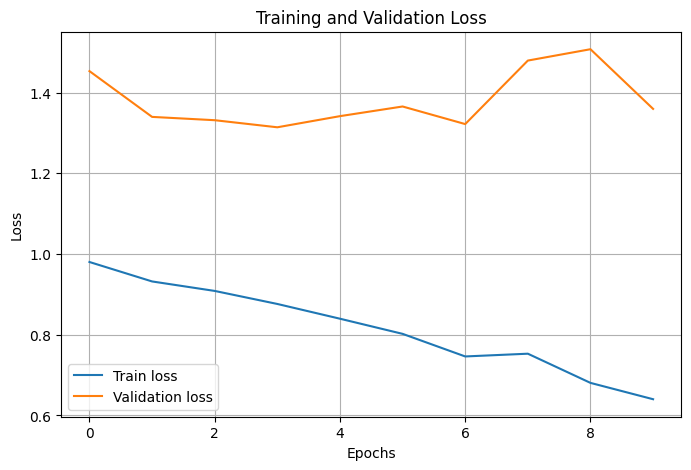

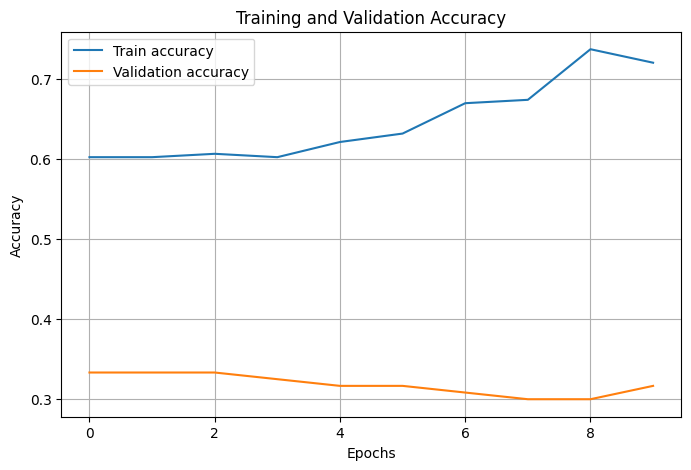

In [47]:
# Example usage:
plot_history(history, metric='loss')
plot_history(history, metric='accuracy')

## Model Performance Improvement

### 2. Neural Network with Adam Optimizer

- Let's change the optimizer to Adam
  - This will introduce momentum as well as an adaptive learning rate

In [48]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [49]:
#Initializing the neural network
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         2,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,831 (11.06 KB)

 Trainable params: 2,831 (11.06 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [52]:
from tensorflow.keras.optimizers import Adam

# -------------------------
# 7️⃣ Define Keras model
# -------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# -------------------------
# 8️⃣ Compile with Adam optimizer
# -------------------------
adam_optimizer = Adam(learning_rate=0.001)  # You can adjust learning rate
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------
# 9️⃣ Train the model
# -------------------------
history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_valid, y_valid_oh),
    batch_size=32,
    epochs=10
)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5764 - loss: 0.9931 - val_accuracy: 0.3333 - val_loss: 1.2017
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6155 - loss: 0.9172 - val_accuracy: 0.3333 - val_loss: 1.3449
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6055 - loss: 0.8920 - val_accuracy: 0.3333 - val_loss: 1.3100
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6326 - loss: 0.8293 - val_accuracy: 0.3333 - val_loss: 1.2874
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6506 - loss: 0.7843 - val_accuracy: 0.3250 - val_loss: 1.2381
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6625 - loss: 0.8321 - val_accuracy: 0.3250 - val_loss: 1.1540
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7331 - loss: 0.7576 - val_accuracy: 0.3083 - val_loss: 1.1743
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7087 - loss: 0.7579 - val_accuracy: 0.3333 - val_loss

In [53]:
model_2_train_perf = model_performance_classification(model, X_train, y_train_oh)
print(model_2_train_perf['accuracy'])
print(model_2_train_perf['classification_report'])


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.6863157894736842
              precision    recall  f1-score   support

           0       1.00      0.34      0.50        95
           1       0.90      0.09      0.17        95
           2       0.66      1.00      0.79       285

    accuracy                           0.69       475
   macro avg       0.85      0.48      0.49       475
weighted avg       0.77      0.69      0.61       475



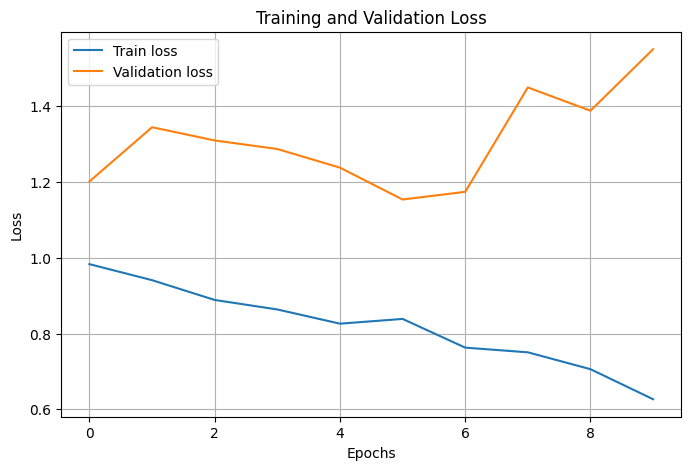

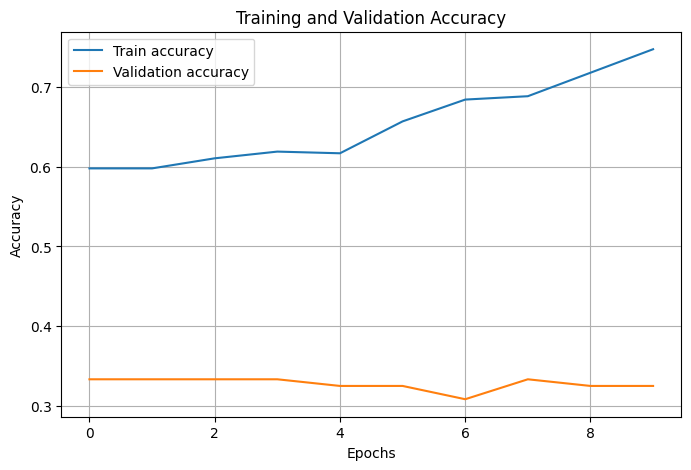

In [54]:
# Example usage:
plot_history(history, metric='loss')
plot_history(history, metric='accuracy')

In [55]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid_oh)
model_2_valid_perf
print(model_2_valid_perf['accuracy'])
print(model_2_valid_perf['classification_report'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.325
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00        40
           2       0.33      0.97      0.50        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



### 3. Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Shapes after SMOTE balancing:
X_train_bal: (855, 276) y_train_bal_oh: (855, 3)
X_valid: (120, 276) y_valid_oh: (120, 3)
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3808 - loss: 1.1230 - val_accuracy: 0.3167 - val_loss: 1.1444
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4467 - loss: 1.0510 - val_accuracy: 0.3333 - val_loss: 1.2037
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 0.9933 - val_accuracy: 0.2833 - val_loss: 1.1607
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6385 - loss: 0.8676 - val_accuracy: 0.3250 - val_loss: 1.3200
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.7458 - val_accuracy: 0.3083 - val_loss: 1.3808
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.6258 - val_accuracy: 0.3333 - val_loss: 1.8364
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.5427 - val_accuracy: 0.3583 - val_loss: 1.93

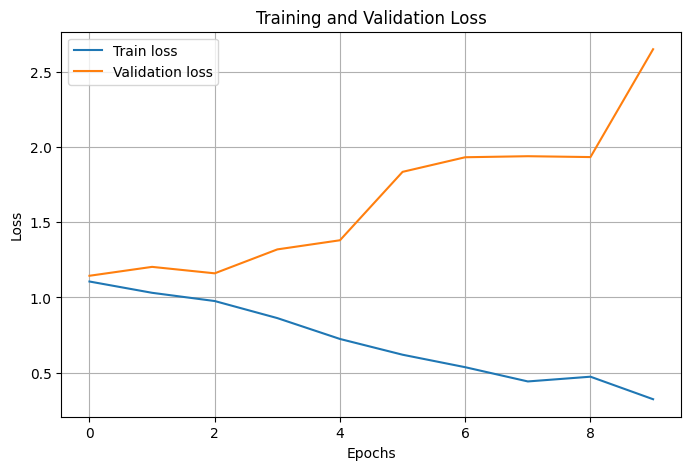

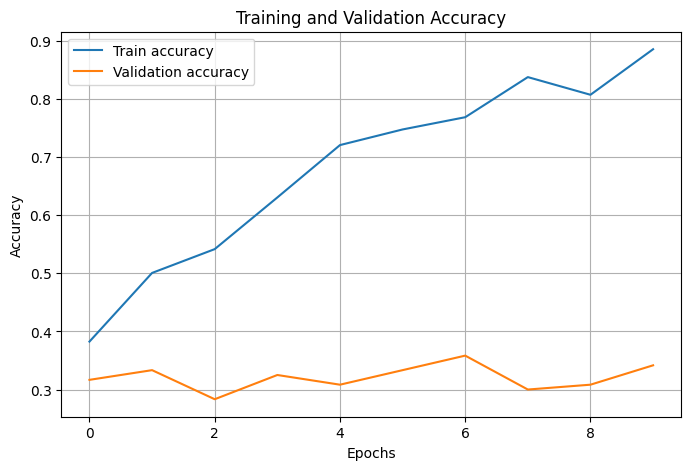

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# -------------------------
# 1️⃣ Example feature data
# -------------------------
X_train = np.random.rand(477, 276)
X_valid = np.random.rand(120, 276)

# -------------------------
# 2️⃣ Example labels
# -------------------------
y_train = pd.Series(['spinel','spinel','multiphase','spinel','fluorite']*95)[:477]
y_valid = pd.Series(['spinel','fluorite','multiphase']*40)[:120]

# -------------------------
# 3️⃣ Create singular_phase column
# -------------------------
value_counts_train = y_train.value_counts()
y_train_phase = y_train.map(lambda x: x if value_counts_train[x] > 1 else 'single-phase').reset_index(drop=True)

value_counts_valid = y_valid.value_counts()
y_valid_phase = y_valid.map(lambda x: x if value_counts_valid[x] > 1 else 'single-phase').reset_index(drop=True)

# -------------------------
# 4️⃣ Encode string labels
# -------------------------
all_labels = pd.concat([y_train_phase, y_valid_phase], axis=0)
le = LabelEncoder()
le.fit(all_labels)

y_train_enc = le.transform(y_train_phase)
y_valid_enc = le.transform(y_valid_phase)

num_classes = len(le.classes_)

# -------------------------
# 5️⃣ Fix mismatch: truncate X_train to match y_train_enc
# -------------------------
min_len = min(X_train.shape[0], len(y_train_enc))
X_train = X_train[:min_len]
y_train_enc = y_train_enc[:min_len]

# -------------------------
# 6️⃣ Apply SMOTE to balance the data
# -------------------------
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal_enc = smote.fit_resample(X_train, y_train_enc)

# One-hot encode after SMOTE
y_train_bal_oh = to_categorical(y_train_bal_enc, num_classes=num_classes)
y_valid_oh = to_categorical(y_valid_enc, num_classes=num_classes)

print("Shapes after SMOTE balancing:")
print("X_train_bal:", X_train_bal.shape, "y_train_bal_oh:", y_train_bal_oh.shape)
print("X_valid:", X_valid.shape, "y_valid_oh:", y_valid_oh.shape)

# -------------------------
# 7️⃣ Define Keras model
# -------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# -------------------------
# 8️⃣ Compile with SGD optimizer
# -------------------------
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------
# 9️⃣ Train the model
# -------------------------
history = model.fit(
    X_train_bal, y_train_bal_oh,
    validation_data=(X_valid, y_valid_oh),
    batch_size=32,
    epochs=10
)

# -------------------------
# 🔟 Plot training history
# -------------------------
def plot_history(history, metric='loss'):
    plt.figure(figsize=(8,5))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history['val_' + metric], label=f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history, 'loss')
plot_history(history, 'accuracy')


In [57]:
model_3_train_perf = model_performance_classification(model, X_train, y_train_oh)
print(model_3_train_perf['accuracy'])
print(model_3_train_perf['classification_report'])


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.8652631578947368
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        95
           1       1.00      0.49      0.66        95
           2       0.82      0.99      0.90       285

    accuracy                           0.87       475
   macro avg       0.93      0.78      0.82       475
weighted avg       0.89      0.87      0.85       475



In [58]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid_oh)
print(model_3_valid_perf['accuracy'])
print(model_3_valid_perf['classification_report'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.3416666666666667
              precision    recall  f1-score   support

           0       0.28      0.12      0.17        40
           1       0.33      0.05      0.09        40
           2       0.35      0.85      0.50        40

    accuracy                           0.34       120
   macro avg       0.32      0.34      0.25       120
weighted avg       0.32      0.34      0.25       120



## Model Performance Comparison and Final Model Selection

In [59]:
models_train_comp_df = pd.DataFrame.from_dict(
    {
        "Model 1": model_1_train_perf,
        "Model 2": model_2_train_perf,
        "Model 3": model_3_train_perf
    },
    orient='index'
)
models_valid_comp_df = pd.DataFrame.from_dict(
    {
        "Model 1": model_1_valid_perf,
        "Model 2": model_2_valid_perf,
        "Model 3": model_3_valid_perf
    },
    orient='index'
)


In [60]:
models_train_comp_df

,accuracy,classification_report
Model 1,0.707368,precision recall f1-score ...
Model 2,0.686316,precision recall f1-score ...
Model 3,0.865263,precision recall f1-score ...


In [61]:
models_valid_comp_df

,accuracy,classification_report
Model 1,0.316667,precision recall f1-score ...
Model 2,0.325000,precision recall f1-score ...
Model 3,0.341667,precision recall f1-score ...


- Final Model: **Neural Network (Adam, SMOTE, No Regularization)**
- Reasoning:
  - Best Accuracy